# Types of supervised learning
- Classification: Target variable consists of categories
- Regression: Target variable is continuous

# Before you use supervised learning
- No missing values
- Data in numeric format
- Data stored in pandas DataFrame or NumPy array

In [1]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# X-model, y- an array of feature
predictions = model.predict(X_new)
print(predictions)

ModuleNotFoundError: No module named 'sklearn.module'

In [2]:
import pandas as pd
df_churn = pd.read_csv('telecom_churn_clean.csv')
df_churn

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [4]:
from sklearn.neighbors import KNeighborsClassifier
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y = df_churn['churn'].values
print(X.shape, y.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

(3333, 2) (3333,)


KNeighborsClassifier(n_neighbors=15)

In [7]:
# Predicting on unlabeled data
import numpy as np
X_new = np.array([[56.8, 17.5],
                [24.4, 24.1],
                [50.1, 10.9]])
print(X_new.shape)

predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

(3, 2)
Predictions: [1 0 0]


In [9]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.872


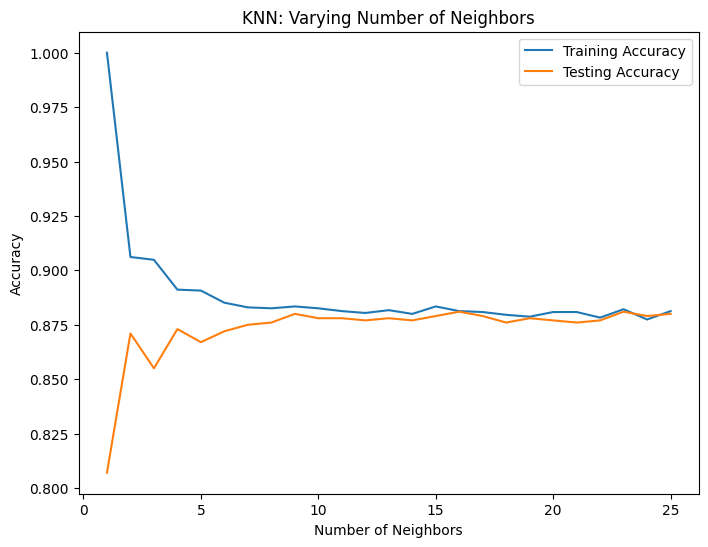

In [11]:
# Model complexity and over/underfitting
import matplotlib.pyplot as plt
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn =KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Plotting our results
plt.figure(figsize=(8, 6))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [1]:
import pandas as pd
diabetes_df = pd.read_csv('diabetes_clean.csv')
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age   
0            6      148         72       35        0  33.6  0.627   50  \
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [2]:
X = diabetes_df.drop('glucose',axis=1).values
y = diabetes_df['glucose'].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [4]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768, 1)


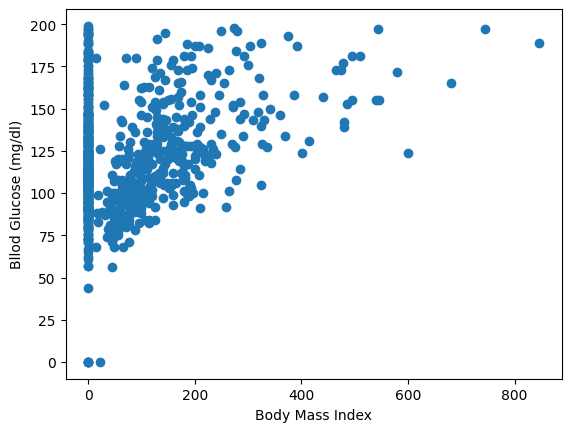

In [5]:
# Plotting glucose vs. body mass index
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Bllod Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

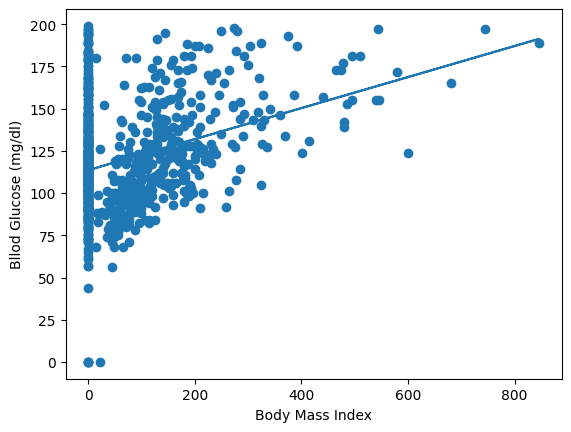

In [6]:
#Fitting a regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Bllod Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [7]:
# Linear regression using all features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [8]:
# RMSE in scikit-learn
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


26.341459582232265

In [9]:
# Cross-validation in scikit-learn
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
0.3190969786734479 0.07015320610114183
[0.24088592 0.41580685]


In [10]:
# Ridge regression in scikit-learn
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.2828466623222221, 0.28320633574804777, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]


In [11]:
# Lasso regression in scikit-learn
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


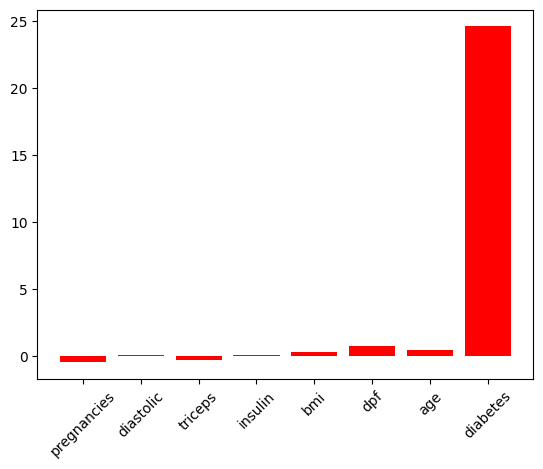

In [14]:
# Lasso for feature selection in scikit-learn
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
names = diabetes_df.drop('glucose', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef, color='red')
plt.xticks(rotation=45)
plt.show()

# Precision
# Positive predictive value: 
        true pos. / (true pos. + false pos.)
# Sensitivity:
        true pos. / (true neg. + false neg.)
# F1 score
        2 * (precision * recall) / (precision+ recall)

In [21]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         0
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         0
          67       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         0
          73       0.00      0.00      0.00         2
          74       0.00      0.00      0.00         3
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          77   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [ ]:
# Predicting probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

In [ ]:
# Plotting the ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# ROC AUC in scikit-learn
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

In [ ]:
# GridSearchCV in scikit-learn
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10), 'solver':['sag','lsqr']}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

In [ ]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10), 'solver':['sag','lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)


In [ ]:
# Evaluating on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

In [1]:
import pandas as pd
music_df = pd.read_csv('music_clean.csv')
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)
print(music_dummies.head())

      1
0  True
1  True
2  True
3  True
4  True


In [2]:
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop('genre', axis=1)

In [3]:
# Encoding dummy variables
music_dummies = pd.get_dummies(music_df, drop_first=True)
print(music_dummies.columns)

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')


In [6]:
# Linear regression with dummy variables
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print(np.sqrt(-linreg_cv))

[10.19270166 10.43734567  9.25570311  9.20541221  9.85376468]


In [7]:
# Dropping missing data
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
print(music_df.isna().sum().sort_values())

<bound method Series.sort_values of Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64>


In [11]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming you have already loaded the music_df DataFrame
X_cat = music_df['genre'].values.reshape(-1, 1)
X_num = music_df.drop(['genre', 'popularity'], axis=1).values
y = music_df['popularity'].values

# Split the data
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=12)

# Impute categorical features
imp_cat = SimpleImputer(strategy='most_frequent')
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

# Impute numerical features
imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

# Combine imputed features
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)


In [15]:
# Imputing within a pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)
X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values

steps = [('imputation', SimpleImputer()), ('logistic_regression', LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [17]:
# Why scale our data?
print(music_df[['duration_ms', 'loudness', 'speechiness']].describe())

        duration_ms     loudness  speechiness
count  1.000000e+03  1000.000000  1000.000000
mean   2.172204e+05    -8.253305     0.077879
std    1.175582e+05     5.158523     0.089451
min   -1.000000e+00   -38.718000     0.023400
25%    1.806562e+05    -9.775500     0.033100
50%    2.163000e+05    -6.855000     0.043600
75%    2.605025e+05    -4.977750     0.074950
max    1.617333e+06    -0.883000     0.710000


In [19]:
# Scaling in scikit-learn
from sklearn.preprocessing import StandardScaler
X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

20666.582585618085 68890.98734103922
3.5971225997855074e-16 0.9999999999999996


In [21]:
# Scaling in a pipeline
from sklearn.neighbors import KNeighborsClassifier
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

1.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

1.0


In [26]:
# CV and scaling in a pipeline
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier)]
pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors':np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_score_)
print(cv.best_params_)

TypeError: BaseEstimator.get_params() missing 1 required positional argument: 'self'

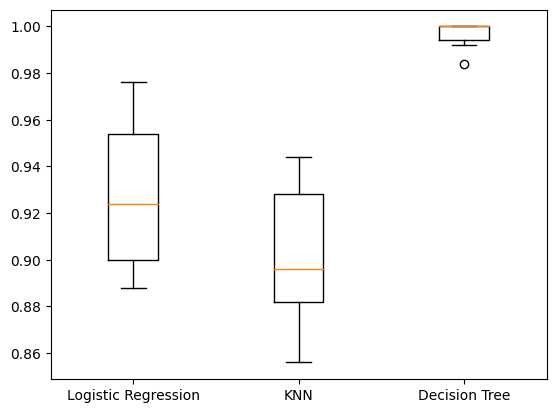

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluating classification models
models = {'Logistic Regression': LogisticRegression(), 'KNN': KNeighborsClassifier(), 'Decision Tree': DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [5]:
# Test set performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accurancy: {}".format(name, test_score))

Logistic Regression Test Set Accurancy: 0.864
KNN Test Set Accurancy: 0.888
Decision Tree Test Set Accurancy: 1.0
